# **Karnataka Mother Tongue Exploratory Data Analysis**
### CSV file obtained from:
https://censusindia.gov.in/census.website/data/census-tables

This data set lists down all the languages spoken in Karnataka, along with their populations, both Male and Female. It also further demarcates the data into Rural and Urban populations. Each Language is assigned a Language code and the data is from all the cities/towns aswell as all of Karnataka aswell.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp

In [2]:
Dt = pd.read_csv(f"DDW-C16-TOWN-STMT-MDDS-2900.csv")

# Primary exploration of the data

To see the features of the data set, the shape of it, the data types etc.

In [3]:
Dt.shape

(15337, 16)

In [4]:
Dt.head(10)

,C-16 POPULATION BY MOTHER TONGUE,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Table,State,District,Town,Area name,Mother,Mother tongue name,Total,NaN,NaN,Rural,NaN,NaN,Urban,NaN,NaN
2,name,code,code,code,NaN,tongue,NaN,P,M,F,P,M,F,P,M,F
3,NaN,NaN,NaN,NaN,NaN,code,NaN,1,2,3,4,5,6,7,8,9
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,C0116,29,000,000000,KARNATAKA,001000,1 ASSAMESE,6887,4784,2103,0,0,0,6887,4784,2103
6,C0116,29,000,000000,KARNATAKA,001002,Assamese,6753,4725,2028,0,0,0,6753,4725,2028
7,C0116,29,000,000000,KARNATAKA,001999,1 Others,134,59,75,0,0,0,134,59,75
8,C0116,29,000,000000,KARNATAKA,002000,2 BENGALI,66368,39763,26605,0,0,0,66368,39763,26605
9,C0116,29,000,000000,KARNATAKA,002007,Bengali,66297,39711,26586,0,0,0,66297,39711,26586


In [5]:
Dt.columns


Index(['C-16 POPULATION BY MOTHER TONGUE', 'Unnamed: 1', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'],
      dtype='object')

In [6]:
Dt.index

RangeIndex(start=0, stop=15337, step=1)

In [7]:
Dt.dtypes

C-16 POPULATION BY MOTHER TONGUE    object
Unnamed: 1                          object
Unnamed: 2                          object
Unnamed: 3                          object
Unnamed: 4                          object
Unnamed: 5                          object
Unnamed: 6                          object
Unnamed: 7                          object
Unnamed: 8                          object
Unnamed: 9                          object
Unnamed: 10                         object
Unnamed: 11                         object
Unnamed: 12                         object
Unnamed: 13                         object
Unnamed: 14                         object
Unnamed: 15                         object
dtype: object

# Cleaning up the tables

Renaming attributes to more appropriate column labels, dropping unnecessary columns, rearranging the columns as seen to be fit, assigning the appropriate data types if not already assigned.

In [8]:
Dt.columns = ["Table","State","District","Town","Area name","Language Code","Mother tongue name","Total P","Total Male","Total female","3","43","65","656","88","7687"]

In [9]:
Dt.head(5)

,Table,State,District,Town,Area name,Language Code,Mother tongue name,Total P,Total Male,Total female,3,43,65,656,88,7687
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Table,State,District,Town,Area name,Mother,Mother tongue name,Total,NaN,NaN,Rural,NaN,NaN,Urban,NaN,NaN
2,name,code,code,code,NaN,tongue,NaN,P,M,F,P,M,F,P,M,F
3,NaN,NaN,NaN,NaN,NaN,code,NaN,1,2,3,4,5,6,7,8,9
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
Dt = Dt.iloc[5:]

In [11]:
Dt

,Table,State,District,Town,Area name,Language Code,Mother tongue name,Total P,Total Male,Total female,3,43,65,656,88,7687
5,C0116,29,000,000000,KARNATAKA,001000,1 ASSAMESE,6887,4784,2103,0,0,0,6887,4784,2103
6,C0116,29,000,000000,KARNATAKA,001002,Assamese,6753,4725,2028,0,0,0,6753,4725,2028
7,C0116,29,000,000000,KARNATAKA,001999,1 Others,134,59,75,0,0,0,134,59,75
8,C0116,29,000,000000,KARNATAKA,002000,2 BENGALI,66368,39763,26605,0,0,0,66368,39763,26605
9,C0116,29,000,000000,KARNATAKA,002007,Bengali,66297,39711,26586,0,0,0,66297,39711,26586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15332,C0116,29,584,626186,Bidadi (CT),022015,Urdu,913,476,437,0,0,0,913,476,437
15333,C0116,29,584,626186,Bidadi (CT),037000,37 COORGI/KODAGU,8,3,5,0,0,0,8,3,5
15334,C0116,29,584,626186,Bidadi (CT),037001,Coorgi/Kodagu,8,3,5,0,0,0,8,3,5
15335,C0116,29,584,626186,Bidadi (CT),117000,117 TULU,43,27,16,0,0,0,43,27,16


In [12]:
Dt = Dt.drop(Dt.columns[[10,11,12,13,14,15]],axis=1)
dt = Dt.rename(columns={'Area name':'Area','Index':'Code','Total P':"Total","Total Male":"Male","Total female":"Female",'Mother tongue name':'Language'})
dt = dt.iloc[:,[4,6,7,8,9,2,3,5]]

In [13]:
dt = dt.reset_index(drop=True)

In [14]:
dt

,Area,Language,Total,Male,Female,District,Town,Language Code
0,KARNATAKA,1 ASSAMESE,6887,4784,2103,000,000000,001000
1,KARNATAKA,Assamese,6753,4725,2028,000,000000,001002
2,KARNATAKA,1 Others,134,59,75,000,000000,001999
3,KARNATAKA,2 BENGALI,66368,39763,26605,000,000000,002000
4,KARNATAKA,Bengali,66297,39711,26586,000,000000,002007
...,...,...,...,...,...,...,...,...
15327,Bidadi (CT),Urdu,913,476,437,584,626186,022015
15328,Bidadi (CT),37 COORGI/KODAGU,8,3,5,584,626186,037000
15329,Bidadi (CT),Coorgi/Kodagu,8,3,5,584,626186,037001
15330,Bidadi (CT),117 TULU,43,27,16,584,626186,117000


In [15]:
dt["Total"] = pd.to_numeric(dt["Total"])
dt.Language = dt.Language.astype('string')

In [16]:
# Test case to see if the data is being queried correctly:

dt.loc[dt.Language == ' Kashmiri'].sort_values(by='Total',ascending=False).head(10)

,Area,Language,Total,Male,Female,District,Town,Language Code
64,KARNATAKA,Kashmiri,2538,1472,1066,000,000000,008005
8488,Bangalore,Kashmiri,2183,1273,910,572,000000,008005
8815,BBMP (M Corp. + OG) (Part),Kashmiri,2169,1261,908,572,803162,008005
12310,Mysore,Kashmiri,79,39,40,577,000000,008005
12575,Mysore (M Corp. + OG),Kashmiri,76,38,38,577,803194,008005
2351,Bidar,Kashmiri,36,30,6,558,000000,008005
7971,Tumkur,Kashmiri,30,13,17,571,000000,008005
4069,Uttara Kannada,Kashmiri,29,19,10,563,000000,008005
8189,Tumkur (CMC),Kashmiri,27,11,16,571,803157,008005
10542,Dakshina Kannada,Kashmiri,24,18,6,575,000000,008005


# List of Languages considered

These are all the languages that are known to be spoken in Karnataka according to the 2011 Census data. The first 357 entries of the table list the populations of the mother tongue considering all of Karnataka as the region, so we subset that into its own table. From this we can analyze all the languages spoken as mother tongues in the state.

In [17]:
glang = dt.head(357)

In [18]:
glang

,Area,Language,Total,Male,Female,District,Town,Language Code
0,KARNATAKA,1 ASSAMESE,6887,4784,2103,000,000000,001000
1,KARNATAKA,Assamese,6753,4725,2028,000,000000,001002
2,KARNATAKA,1 Others,134,59,75,000,000000,001999
3,KARNATAKA,2 BENGALI,66368,39763,26605,000,000000,002000
4,KARNATAKA,Bengali,66297,39711,26586,000,000000,002007
...,...,...,...,...,...,...,...,...
352,KARNATAKA,122 ZEMI,7,6,1,000,000000,122000
353,KARNATAKA,Zemi,7,6,1,000,000000,122003
354,KARNATAKA,123 ZOU,19,14,5,000,000000,123000
355,KARNATAKA,Zou,19,14,5,000,000000,123001


In [19]:
# Of all the 357 languages, most have them have barely any speakers and are negligible to the study.
# So we further subset them down to languages that have more than 500 active speakers.

slang = glang.loc[glang.Total > 500]

# Removing duplicate languages:

Only 76 languages have more than 500 speakers in all of Karnataka. Most of these languages however still have duplicate entries.

All the languages starting with numbers and that are capitalized are 34 out of the 76. The lowercase ones start with a whitespace and have 42 out of the 76 so we will be keeping those as the upper case languages are a subset of the lower-case list of languages.

In [20]:

slang.head(20)

,Area,Language,Total,Male,Female,District,Town,Language Code
0,KARNATAKA,1 ASSAMESE,6887,4784,2103,000,000000,001000
1,KARNATAKA,Assamese,6753,4725,2028,000,000000,001002
3,KARNATAKA,2 BENGALI,66368,39763,26605,000,000000,002000
4,KARNATAKA,Bengali,66297,39711,26586,000,000000,002007
10,KARNATAKA,4 DOGRI,718,482,236,000,000000,004000
11,KARNATAKA,Dogri,718,482,236,000,000000,004001
12,KARNATAKA,5 GUJARATI,103533,53051,50482,000,000000,005000
13,KARNATAKA,Gujarati,57286,29466,27820,000,000000,005018
16,KARNATAKA,Saurashtra/Saurashtri,4343,2247,2096,000,000000,005057
17,KARNATAKA,5 Others,41856,21311,20545,000,000000,005999


In [21]:
slang.loc[slang.Language.str.startswith(('1','2','3','4','5','6','7','8','9','0'))].Language.count()

34

In [22]:
slang.loc[slang.Language.str.startswith((' '))].Language.count()

42

In [23]:
slang = slang.loc[slang.Language.str.startswith((' '))]
slang = slang.sort_values(by='Total',ascending=False)

In [24]:
# List of languages without duplicates.

slang.head(10)

,Area,Language,Total,Male,Female,District,Town,Language Code
59,KARNATAKA,Kannada,11603571,5893674,5709897,000,000000,007016
127,KARNATAKA,Urdu,4475953,2273577,2202376,000,000000,022015
123,KARNATAKA,Telugu,1949606,988809,960797,000,000000,021046
120,KARNATAKA,Tamil,1772547,894789,877758,000,000000,020027
91,KARNATAKA,Marathi,822356,414937,407419,000,000000,013071
34,KARNATAKA,Hindi,672651,387775,284876,000,000000,006240
343,KARNATAKA,Tulu,605249,294735,310514,000,000000,117009
81,KARNATAKA,Malayalam,433409,219172,214237,000,000000,011016
69,KARNATAKA,Konkani,423846,206971,216875,000,000000,009011
40,KARNATAKA,Lamani/Lambadi,114896,59365,55531,000,000000,006353


<Axes: title={'center': 'Mother Tongues of Karnataka Inhabitants'}, xlabel='Mother Tongues (in Crores)'>

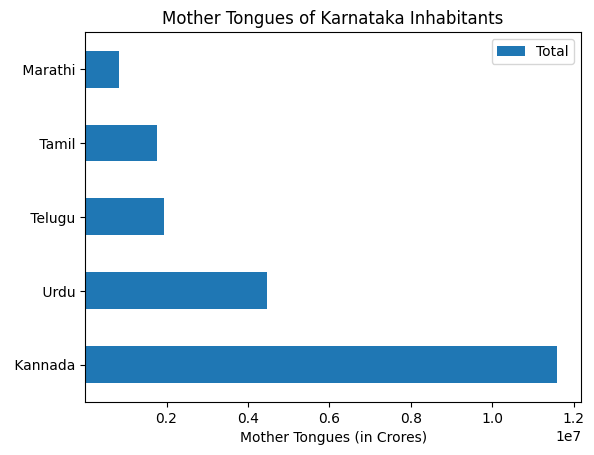

In [25]:
slang.head(5).plot(title="Mother Tongues of Karnataka Inhabitants", kind='barh', x="Language", y="Total", xlabel="Mother Tongues (in Crores)", ylabel="", xticks=[2000000,4000000,6000000,8000000,10000000,12000000])